In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pingouin as pg
import scipy.stats as stats

In [26]:
def add_values(ax, fontsize=12, color='black', padding=3):
    """
    Add values of each column of a graph on the graph.
    
    Params :
    - ax : Axes object of the concerned graph
    - fontsize : size of the annotations
    - color : Color of the annotations
    - padding : Space between the bar and the annotations
    """
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate("{:.2f}".format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='bottom', 
                        fontsize=fontsize, color=color,
                        xytext=(0, padding), textcoords="offset points")

In [27]:
# Load data
data = pd.read_excel('salaries_data.xlsx')

## Cleaning and initial exploration of the dataset
### Data quality

In [28]:
# Look at the data structure
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,24000,EUR,26666,SK,0,SK,M
1,2024,MI,FT,Data Scientist,24000,EUR,26666,SK,0,SK,M
2,2024,MI,FT,Data Scientist,172000,USD,172000,US,0,US,M
3,2024,MI,FT,Data Scientist,75600,USD,75600,US,0,US,M
4,2024,MI,FT,Data Scientist,205500,USD,205500,US,0,US,M


In [29]:
# Check data quality
print(data.shape)
data.describe(include='all')

(20593, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,20593.000000,20593,20593,20593,2.059300e+04,20593,20593.000000,20593,20593.000000,20593,20593
unique,NaN,4,4,64,NaN,20,NaN,76,NaN,68,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,11387,20499,8903,NaN,19520,NaN,18661,NaN,18688,19296
mean,2023.683242,NaN,NaN,NaN,1.537218e+05,NaN,146034.376827,NaN,23.945030,NaN,NaN
std,0.599825,NaN,NaN,NaN,2.802904e+05,NaN,67448.166124,NaN,42.450498,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.440000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,9.700000e+04,NaN,97000.000000,NaN,0.000000,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.376000e+05,NaN,137000.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.850000e+05,NaN,184300.000000,NaN,0.000000,NaN,NaN


Dataset present 20593 raws for 11 columns. No missing data to report.

In [30]:
# Data type analysis
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Regarding data types we have or want :
| Column name      | Qualitative/Quantitative | Discreat/Continuous | Ordinal/Cardinal | dtype |
| :--------------- | :--------------- | :--------------- | :--------------- | :--------------- |
| work_year        | Quantitative     | Discreat         |                  | int64            |
| experience_level | Qualitative      |                  | Ordinal     | Categorical (ordered) |
| employement_type | Qualitative      |                  | Cardinal         | Categorical      |
| job_title        | Qualitative      |                  | Cardinal         | object (str)     |
| salary           | Quantitative     | Continuous       |                  | int64            |
| salary_currency  | Qualitative      |                  | Ordinal          | object           |
| salary_in_usd    | Quantitative     | Continuous       |                  | int64            |
| employee_residence | Qualitative    |                  | Cardinal         | object (str)     |
| remote_ratio     | Quantitative     | Discreat         |                  | int64            |
| company_location | Qualitative      |                  | Cardinal         | object (str)     |
| company_size     | Qualitative      |                  | Ordinal     | Categorical (ordered) |

In [31]:
# Get data types neat and clean
experience_levels_order = ['EN', 'MI', 'SE', 'EX']
data['experience_level'] = pd.Categorical(data['experience_level'], categories=experience_levels_order, ordered=True)

employment_types = ['PT', 'FT', 'CT', 'FL']
data['employment_type'] = pd.Categorical(data['employment_type'], categories=employment_types)

company_sizes_order = ['S', 'M', 'L']
data['company_size'] = pd.Categorical(data['company_size'], categories=company_sizes_order, ordered=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20593 entries, 0 to 20592
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           20593 non-null  int64   
 1   experience_level    20593 non-null  category
 2   employment_type     20593 non-null  category
 3   job_title           20593 non-null  object  
 4   salary              20593 non-null  int64   
 5   salary_currency     20593 non-null  object  
 6   salary_in_usd       20593 non-null  int64   
 7   employee_residence  20593 non-null  object  
 8   remote_ratio        20593 non-null  int64   
 9   company_location    20593 non-null  object  
 10  company_size        20593 non-null  category
dtypes: category(3), int64(4), object(4)
memory usage: 1.3+ MB


### Keep only the 5 most common job titles

In [33]:
# Find most common job titles
most_common_job_titles = data['job_title'].value_counts().nlargest(5)
print(type(most_common_job_titles), most_common_job_titles)

<class 'pandas.core.series.Series'> job_title
Data Scientist                    8903
Data Analyst                      5405
Research Scientist                1847
Applied Scientist                 1188
Business Intelligence Engineer     474
Name: count, dtype: int64


## Univaried Analysis
### Salary distribution

Median : 137000.0 
Q1 : 97000.0 
Q3 : 184300.0


Text(0.5, 1.0, 'Distribution of salaries (in USD)')

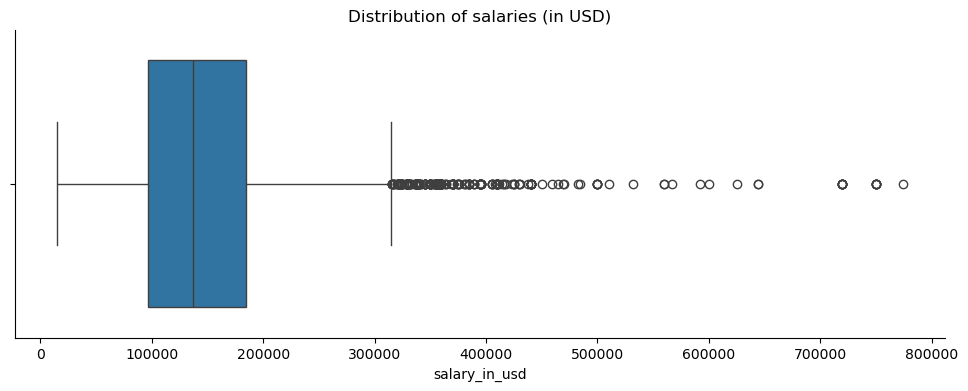

In [34]:
print(f"Median : {data['salary_in_usd'].median()} \nQ1 : {data['salary_in_usd'].quantile(0.25)} \nQ3 : {data['salary_in_usd'].quantile(0.75)}")

fig1 = plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='salary_in_usd')
sns.despine(fig=fig1, top=True, right=True)
plt.title("Distribution of salaries (in USD)")

The median salary (in USD) regarding any job or seniority is $140,000. Most of the salaries are between $100,000 and $187,200. 

In [35]:
# Outliers analysis
iqr = data['salary_in_usd'].quantile(0.75) - data['salary_in_usd'].quantile(0.25)

up_threshold = data['salary_in_usd'].median() + iqr*1.5
down_threshold = data['salary_in_usd'].median() - iqr*1.5
outliers_iqr = data.loc[(data['salary_in_usd'] > up_threshold) | (data['salary_in_usd'] < down_threshold)]

print("Percent of outliers in the data set :")
print(f"{100*outliers_iqr.shape[0]/data.shape[0]:.2f}%")

Percent of outliers in the data set :
4.39%


We can also note a good amout of big salary outliers.

Text(0.5, 1.0, 'Histogram of salaries (in USD)')

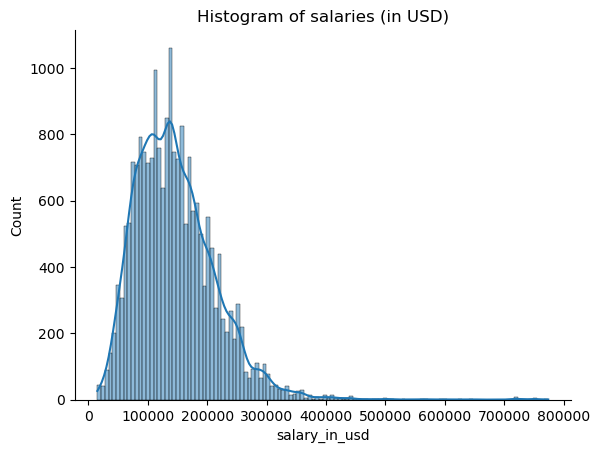

In [36]:
# Distribution of salaries
ax2 = sns.histplot(data=data, x='salary_in_usd', kde=True)
sns.despine(ax=ax2, top=True, right=True)
plt.title("Histogram of salaries (in USD)")

The complete distribution looks Poisson-like.

### Level of experience

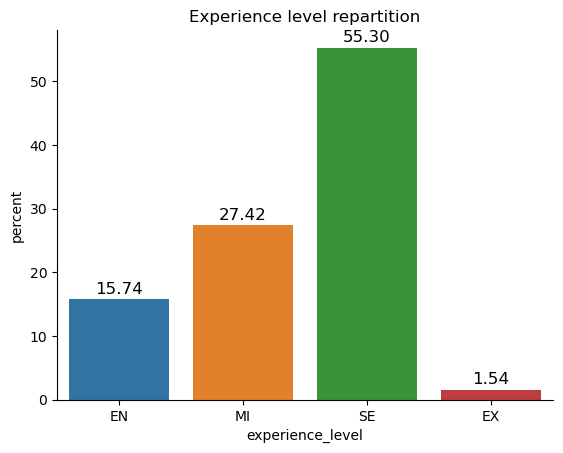

In [37]:
ax3 = sns.countplot(data=data, x='experience_level', hue='experience_level', stat='percent')
sns.despine(ax=ax3, top=True, right=True)
plt.title("Experience level repartition")
add_values(ax3, padding=2)

We observe a majority of senior position (57%) in the pool but very few executive ones (1%). 

### Remote working ratio

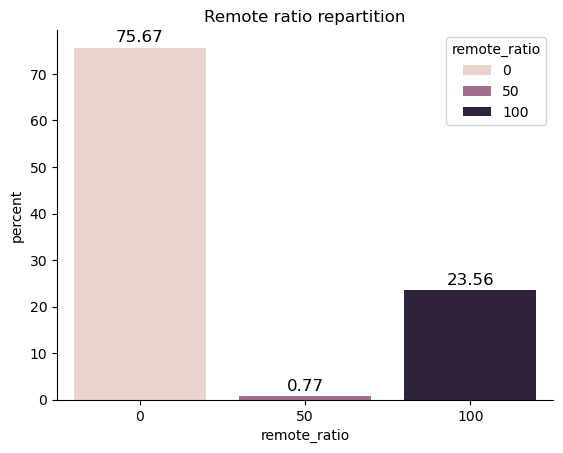

In [38]:
ax4 = sns.countplot(data=data, x='remote_ratio', hue='remote_ratio', stat='percent')
sns.despine(ax=ax4, top=True, right=True)
plt.title("Remote ratio repartition")
add_values(ax4, padding=2)

We observe a 3/4 ratio of office-based employees for 1/4 of full remote employees. Only a fraction of employees (less than 1%) have n hybrid contract.

## Bivariate analysis
### Experience level VS Salary

Text(0.5, 1.0, 'Repartition of salary (in USD) for each experience level')

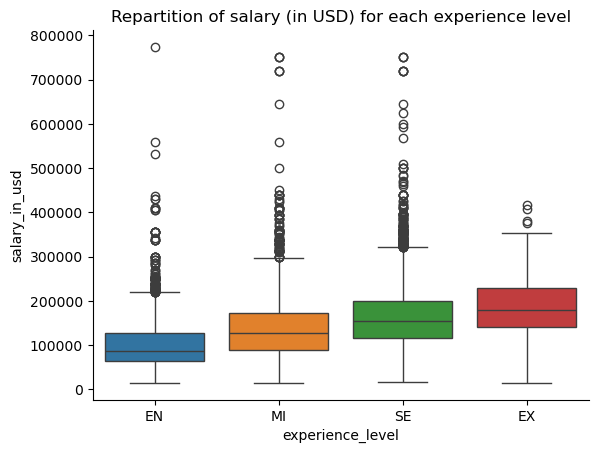

In [39]:
ax1 = sns.boxplot(data=data, x='experience_level', y='salary_in_usd', hue='experience_level')
sns.despine(ax=ax1, top=True, right=True)
plt.title("Repartition of salary (in USD) for each experience level")

> Note : we use <code>salary_in_usd</code> to compare comparable values.  

We observe a general trend for salaries to increase with experience level. However, we can highlight a large number of outliers indicate a high degree of variability, perhaps linked to other variables.

Text(0.5, 1.0, 'Salary and Experience Level Spearman Correlation Matrix')

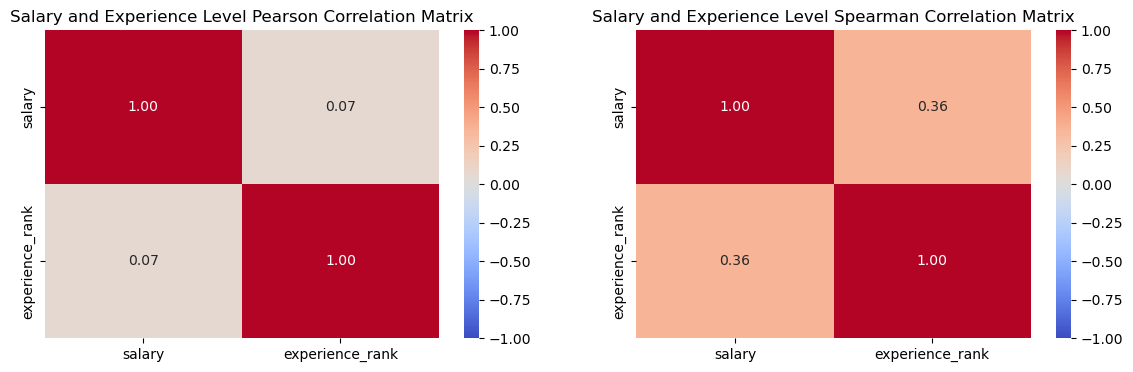

In [40]:
## Correlation analysis
# Make dataset
sal_vs_xp_corr = pd.DataFrame()
sal_vs_xp_corr['salary'] = data['salary']
# sal_vs_xp_corr['experience_level'] = data['experience_level']
mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
sal_vs_xp_corr['experience_rank'] = data['experience_level'].map(mapping)

# Compute correlation 
corr_matrix_pearson = sal_vs_xp_corr.corr(method='pearson')
corr_matrix_spearman = sal_vs_xp_corr.corr(method='spearman')

# Plot it
fig, (ax12, ax13) = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))
sns.heatmap(corr_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=ax12)
ax12.set_title('Salary and Experience Level Pearson Correlation Matrix')
sns.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=ax13)
ax13.set_title('Salary and Experience Level Spearman Correlation Matrix')

We oberve a correlation between the experiencelevel and the salary. The correlation seems not linear wich make sense because we use a rank as experience level and not a value that measure it.

### Contract type VS Salaries

Text(0.5, 1.0, 'Repartition of salary (in USD) for each type of contract')

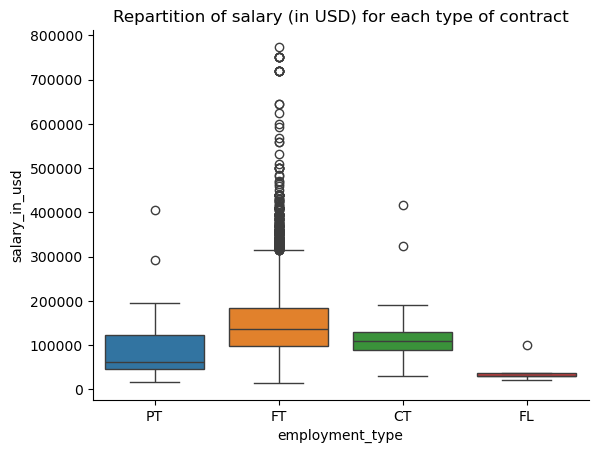

In [41]:
ax2 = sns.boxplot(data=data, x='employment_type', y='salary_in_usd', hue='employment_type')
sns.despine(ax=ax2, top=True, right=True)
plt.title("Repartition of salary (in USD) for each type of contract")

We observe that Full Time contracts earn more money than Part Time ones as expected.  
Fixed Contract (CT) and Full Time seems to earn the same amount while Freelancers are clearly less paid.

In [42]:
# Hypothesis Test (ANOVA) - Differences between salaries are significantly explained by employment type
groupes = data.groupby('employment_type')['salary'].apply(list)
print(data['employment_type'].value_counts(), '\n')

# Test ANOVA
f_value, p_value = stats.f_oneway(*groupes)
print('ANOVA results')
print("F value :", f_value)
print("p-value :", p_value)

employment_type
FT    20499
PT       60
CT       29
FL        5
Name: count, dtype: int64 

ANOVA results
F value : 4.151335037784595
p-value : 0.00598887202937936


C:\Users\manon\AppData\Local\Temp\ipykernel_16104\3077596085.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = data.groupby('employment_type')['salary'].apply(list)


In [43]:
# Hypothesis Test (ANOVA Welch because of sample size and variances) - Differences between salaries are significantly explained by employment type

# Test - ANOVA Welch
print('ANOVA results')
results_welch = pg.welch_anova(dv='salary', between='employment_type', data=data)
print("F value :", results_welch['F'][0])
print("p-value :", results_welch['p-unc'][0])

ANOVA results
F value : 25.319355235487023
p-value : 1.9105340415897377e-06


We oberve a great F and p-value<0.05. According to this test, the difference between salaries in the different groups of employment type are probably not due to luck.  
> Note : we can't claim independance in the dataset without further information about the collection proscess and dependance would probably distort the result of an ANOVA test.  

### Localisation VS Remote ratio

In [44]:
# Create boolean column with the remote ratio
loc_vs_remote_data = pd.DataFrame()
loc_vs_remote_data['company_location'] = data['company_location']
loc_vs_remote_data['remote_ratio'] = data['remote_ratio']
loc_vs_remote_data['remote_0'] = data['remote_ratio'] == 0
loc_vs_remote_data['remote_50'] = data['remote_ratio'] == 50
loc_vs_remote_data['remote_100'] = data['remote_ratio'] == 100

# Compute the percentage of each remote_ratio in each location
loc_vs_remote_grouped = loc_vs_remote_data.groupby('company_location').agg({
    'remote_0' : 'mean',
    'remote_50' : 'mean',
    'remote_100' : 'mean',
}).reset_index()

# Melt it to ease the visualisation
loc_vs_remote_melted = loc_vs_remote_grouped.melt(id_vars=['company_location'], 
                                                  value_vars=['remote_0', 'remote_50', 'remote_100'], 
                                                  var_name='remote_ratio',  
                                                  value_name='percentage')
loc_vs_remote_melted['remote_ratio'] = loc_vs_remote_melted['remote_ratio'].str.replace('remote_', '') + '%'
loc_vs_remote_melted['percentage'] = loc_vs_remote_melted['percentage'] * 100


Text(0.5, 1.0, 'Remote ratio percentage in each company location')

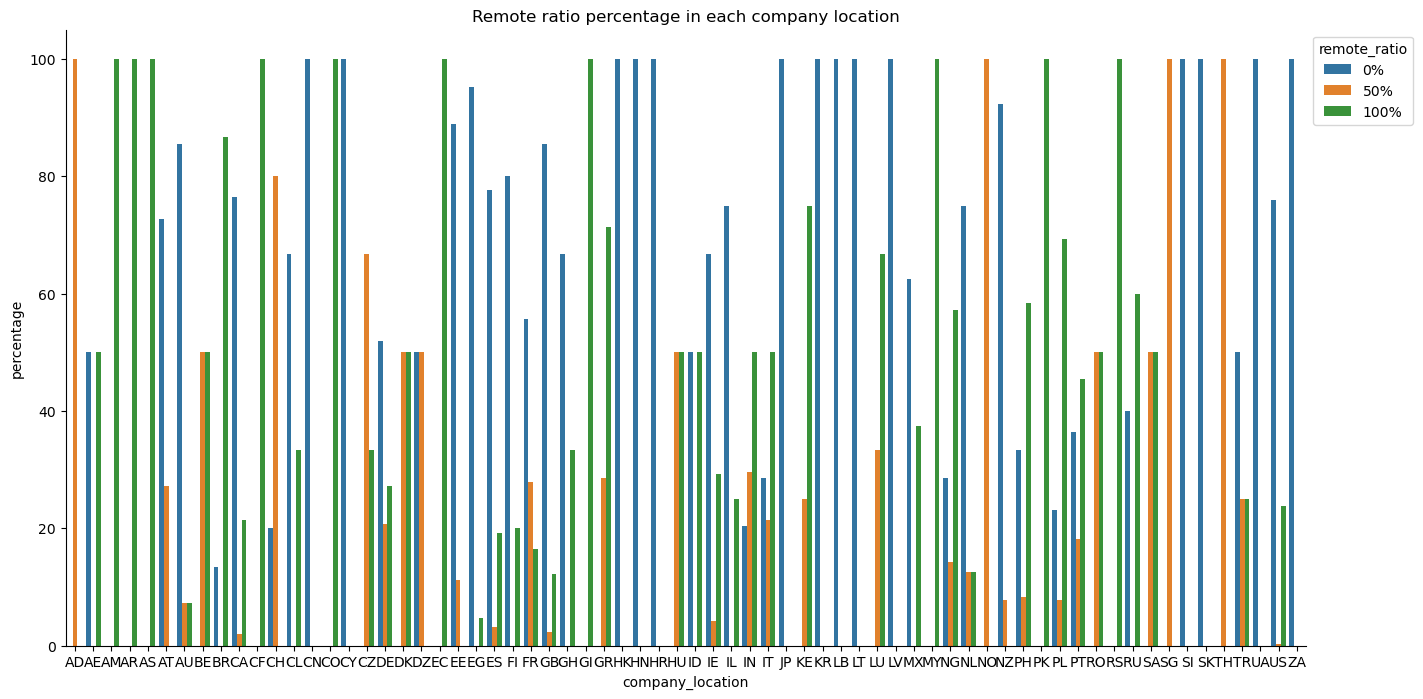

In [45]:
# Grouped bar
fig, ax3 = plt.subplots(figsize=(16, 8))
ax3 = sns.barplot(data=loc_vs_remote_melted, x='company_location', y='percentage', hue='remote_ratio')
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
sns.despine(ax=ax3, top=True, right=True)
plt.title("Remote ratio percentage in each company location")

The plot is unusable as it is. There are overall way too many bars.

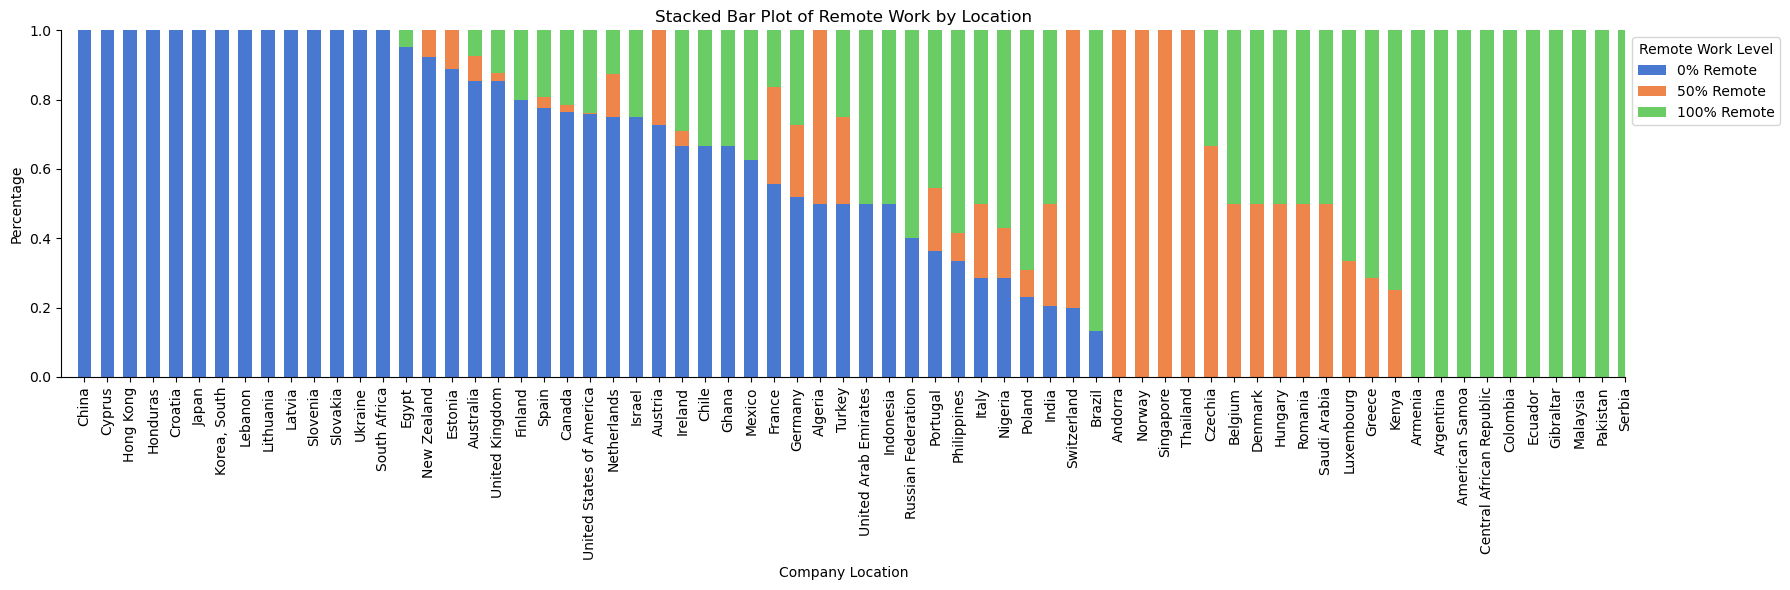

In [46]:
## Stacked barplot - even if usualy, it is not the best practice, here could be useful
# Put the full country name
country_name = pd.read_csv('country_name.csv')
loc_vs_remote_grouped = pd.merge(left=loc_vs_remote_grouped, right=country_name, left_on='company_location', right_on='Code', how='left')

# Sort the data frame by croissant full office employees (remote 0%)
loc_vs_remote_grouped.sort_values(by=['remote_0', 'remote_100'], ascending=[False, True], inplace=True)
loc_vs_remote_grouped.reset_index(drop=True, inplace=True)

# Init
fig, ax4 = plt.subplots(figsize=(18, 6))
colors = sns.color_palette("muted")[:3]
labels = ['0% Remote', '50% Remote', '100% Remote']

# x position of bars
# x = loc_vs_remote_grouped.index * 5
x = np.arange(len(loc_vs_remote_grouped))
# Stacking height
bottom = [0] * loc_vs_remote_grouped.shape[0]  # Pour accumuler les hauteurs successives

# Add each value
for i, col in enumerate(['remote_0', 'remote_50', 'remote_100']):
    ax4.bar(x, loc_vs_remote_grouped[col], label=labels[i], bottom=bottom, color=colors[i], width = 0.6)
    bottom += loc_vs_remote_grouped[col]  # Mise à jour du bas de la prochaine barre

# Cosmetics
ax4.set_xlim(left=-1, right=60)
ax4.set_xticks(x)
ax4.set_xticklabels(loc_vs_remote_grouped['Label'], rotation=90)
ax4.set_xlabel("Company Location")
ax4.set_ylabel("Percentage")
ax4.set_title("Stacked Bar Plot of Remote Work by Location")
ax4.legend(title="Remote Work Level", bbox_to_anchor=(1, 1), loc='upper left')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


We observe that majority of countries practice the same remote work level for everyone so yes, the country seems to have an impact on the remote work level.  
Overall, a great majority of countries practice remote working at some point, even if it is not for every one.  

It could be interesting to study if there is any geographical trends.

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

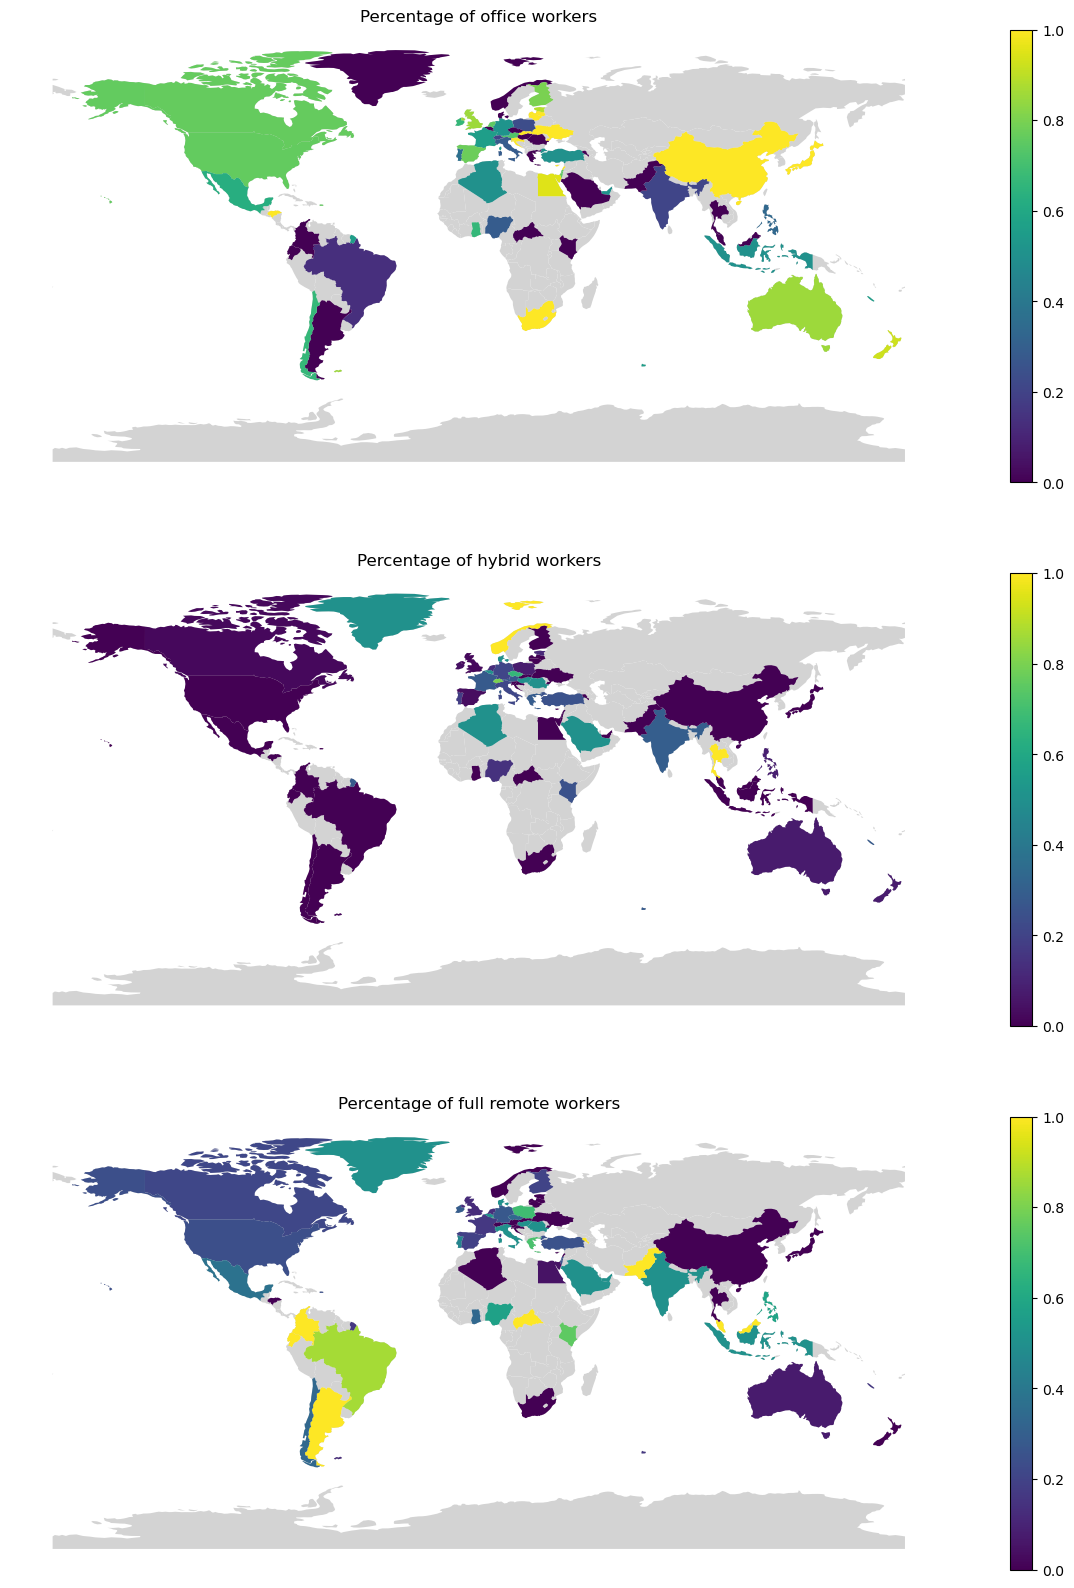

In [47]:
# Map plot
url ="https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

loc_vs_remote_grouped["Label"].map({"Russian Federation" : 'Russia'})
map_data = pd.merge(left=world, right=loc_vs_remote_grouped, left_on='SOVEREIGNT', right_on='Label', how='left')

# Plot grey background
fig, (ax5, ax6, ax7) = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
world.plot(ax=ax5, color='lightgrey')
world.plot(ax=ax6, color='lightgrey')
world.plot(ax=ax7, color='lightgrey')


# Plot data
map_data.plot(ax=ax5, column='remote_0', legend=True, cmap='viridis')
map_data.plot(ax=ax6, column='remote_50', legend=True)
map_data.plot(ax=ax7, column='remote_100', legend=True)

# Titles
ax5.set_title("Percentage of office workers")
ax6.set_title("Percentage of hybrid workers")
ax7.set_title("Percentage of full remote workers")

# Despine everything
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')

We oberve a trend in North-American an European countries : full office seems common practice.  
Hybrid contracts are really not popular in America (from North to South) and Oceania but used a bit un central Europe.  
Full remote workers seems usual in South America but not as frequent in the rest of the world.

> Note : Some countries are missing.


### Company location VS Salary

In [48]:
# Put the full country name
country_name = pd.read_csv('country_name.csv')
loc_vs_salary = pd.DataFrame()
loc_vs_salary['country_iso'] = data['company_location']
loc_vs_salary['salary'] = data['salary_in_usd']
loc_vs_salary = pd.merge(left=loc_vs_salary, right=country_name, left_on='country_iso', right_on='Code', how='left')
loc_vs_salary.drop(columns=['Definition', 'Has exact match'], inplace=True)

KeyError: "['Definition', 'Has exact match'] not found in axis"

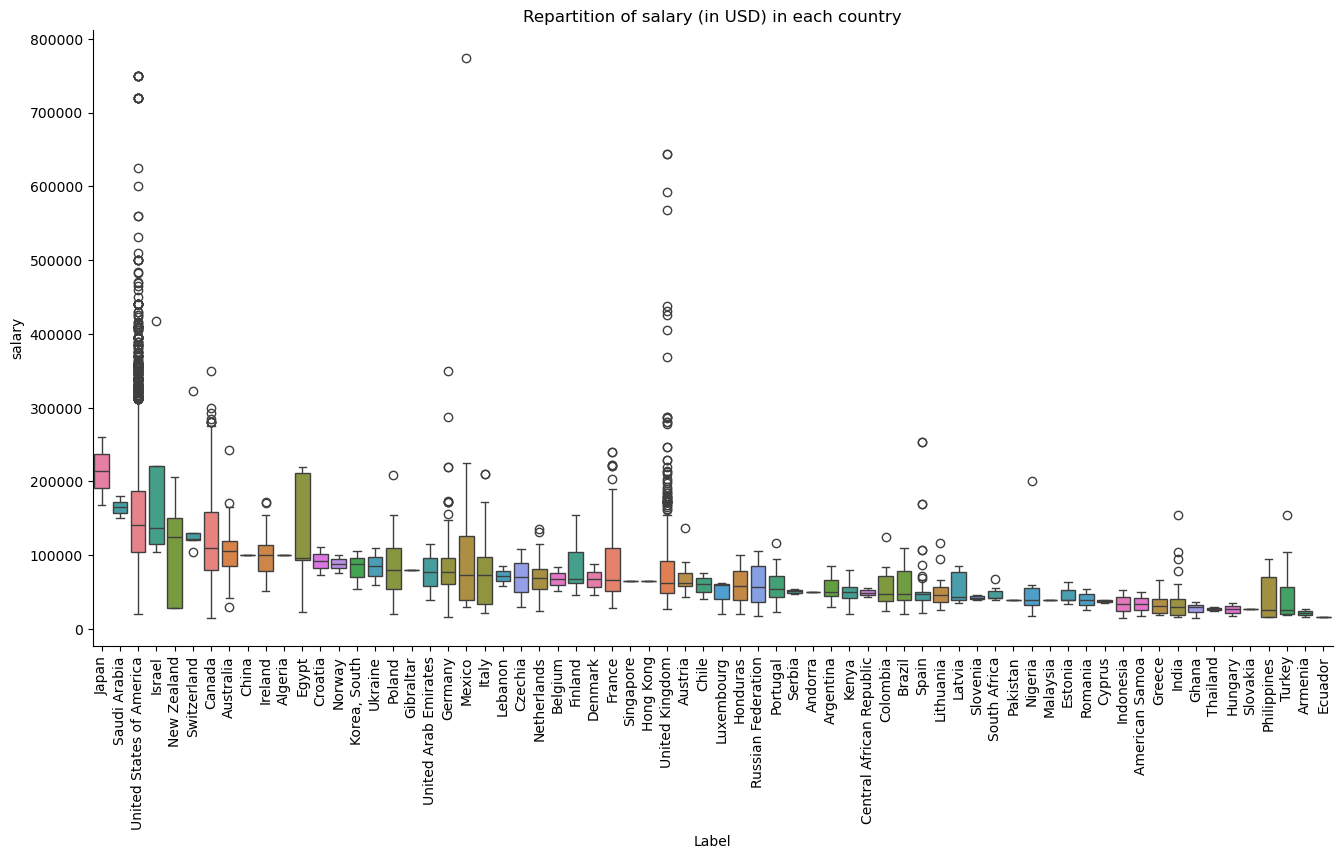

In [ ]:
# Determine mean order
median_salaries_by_country = loc_vs_salary.groupby('Label')['salary'].median()
column_order = median_salaries_by_country.sort_values(ascending=False).index

fig, ax8 = plt.subplots(figsize=(16, 8))
sns.boxplot(ax=ax8, data=loc_vs_salary, x='Label', y='salary', hue='Label', order=column_order)
sns.despine(ax=ax8, top=True, right=True)
plt.title("Repartition of salary (in USD) in each country")
ticks = plt.xticks(rotation=90)


We oberve differences between salary distributions but more importantly a significant amount of courties with just a few employees. We can't compare results in that case.

In [ ]:
# Remove countries with only a few employees 
thresh = 5
count_by_coutries = loc_vs_salary['country_iso'].value_counts()
enough_employees_countries = count_by_coutries[count_by_coutries > thresh].index

loc_vs_salary = loc_vs_salary[loc_vs_salary['country_iso'].isin(enough_employees_countries)]


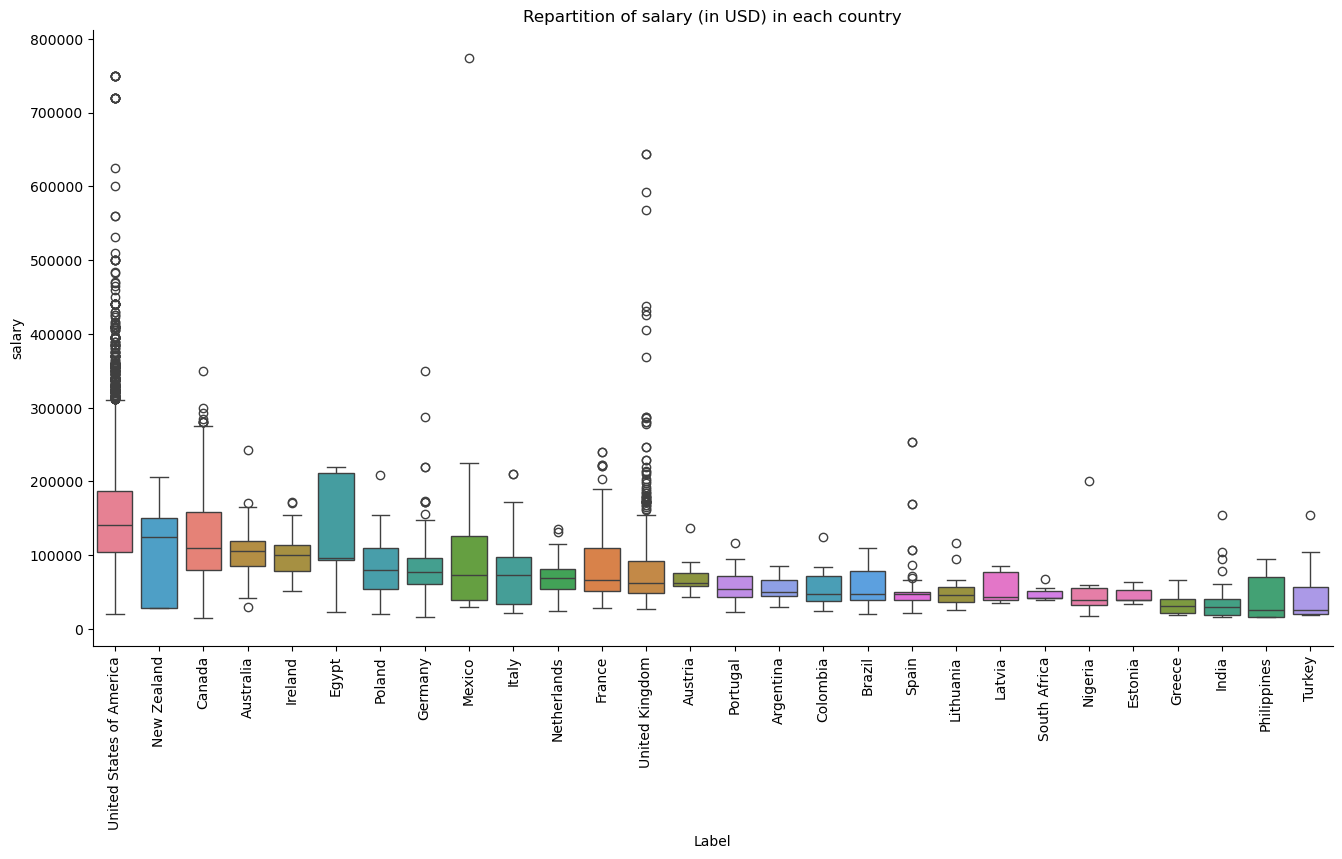

In [ ]:
# Determine mean order
median_salaries_by_country = loc_vs_salary.groupby('Label')['salary'].median()
column_order = median_salaries_by_country.sort_values(ascending=False).index

fig, ax8 = plt.subplots(figsize=(16, 8))
sns.boxplot(ax=ax8, data=loc_vs_salary, x='Label', y='salary', hue='Label', order=column_order)
sns.despine(ax=ax8, top=True, right=True)
plt.title("Repartition of salary (in USD) in each country")
ticks = plt.xticks(rotation=90)


In [ ]:
# Hypothesis Test (ANOVA Welch because of sample size and variances) - Differences between salaries are significantly explained by employment type
# Test - ANOVA Welch
print('ANOVA results')
results_welch = pg.welch_anova(dv='salary', between='country_iso', data=loc_vs_salary)
print("F value :", results_welch['F'][0])
print("p-value :", results_welch['p-unc'][0])

ANOVA results
F value : 182.70193472368487
p-value : 8.420948182043825e-88


We oberve a very big F and p-value<0.05. According to this test, the difference between salaries in the different locations are probably not due to luck.  
> Note : we can't claim independance in the dataset without further information about the collection proscess and dependance would probably distort the result of an ANOVA test.  

Text(0.5, 1.0, 'Repartition of salary (in USD) in flop 5 paying countries')

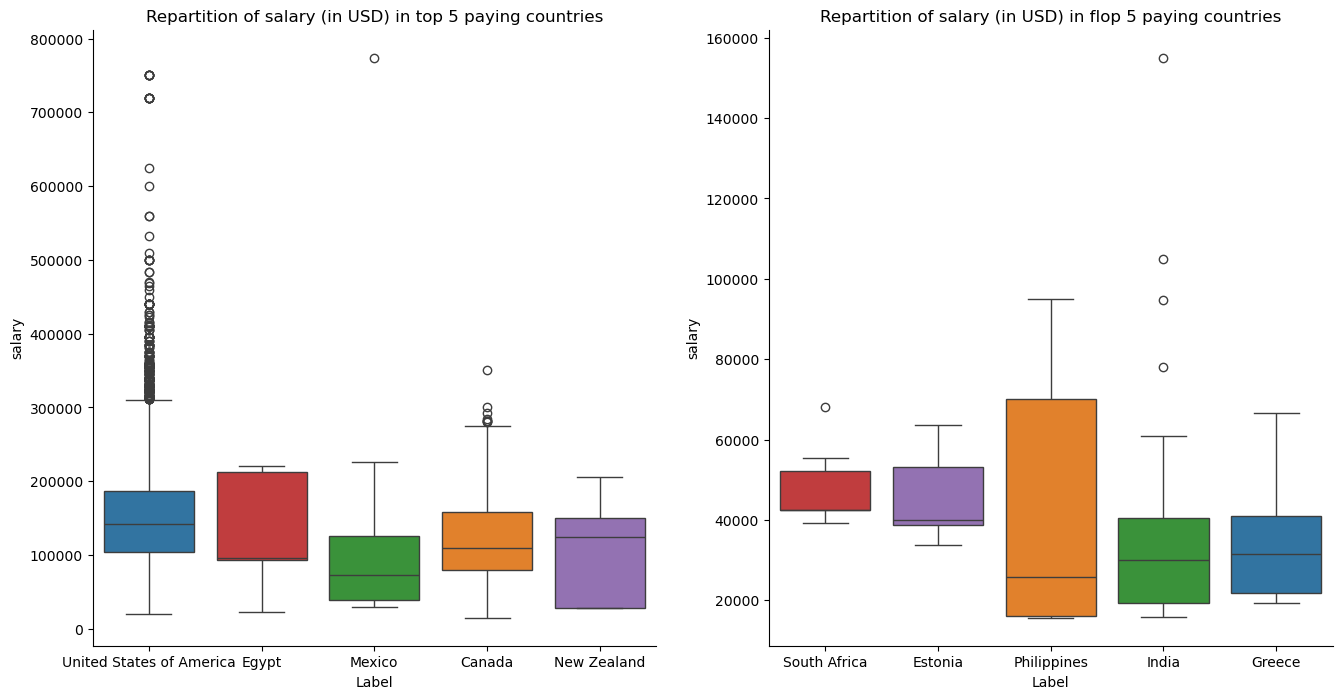

In [ ]:
# Find top 5 paying countries
mean_salaries_by_country = loc_vs_salary.groupby('Label')['salary'].mean()
paying_countries_order = mean_salaries_by_country.sort_values(ascending=False).index
fig, (ax9, ax10) = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
sns.boxplot(ax=ax9, data=loc_vs_salary[loc_vs_salary['Label'].isin(paying_countries_order[:5])], x='Label', y='salary', hue='Label', order=paying_countries_order[:5])
sns.despine(ax=ax9, top=True, right=True)
ax9.set_title("Repartition of salary (in USD) in top 5 paying countries")

sns.boxplot(ax=ax10, data=loc_vs_salary[loc_vs_salary['Label'].isin(paying_countries_order[-5:])], x='Label', y='salary', hue='Label', order=paying_countries_order[-5:])
sns.despine(ax=ax10, top=True, right=True)
ax10.set_title("Repartition of salary (in USD) in flop 5 paying countries")


The median and mean salary seems to change based on the country but the differences could also be explained by other factors such as the exprience level and **greatly** biased by the number of employees concerned.

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

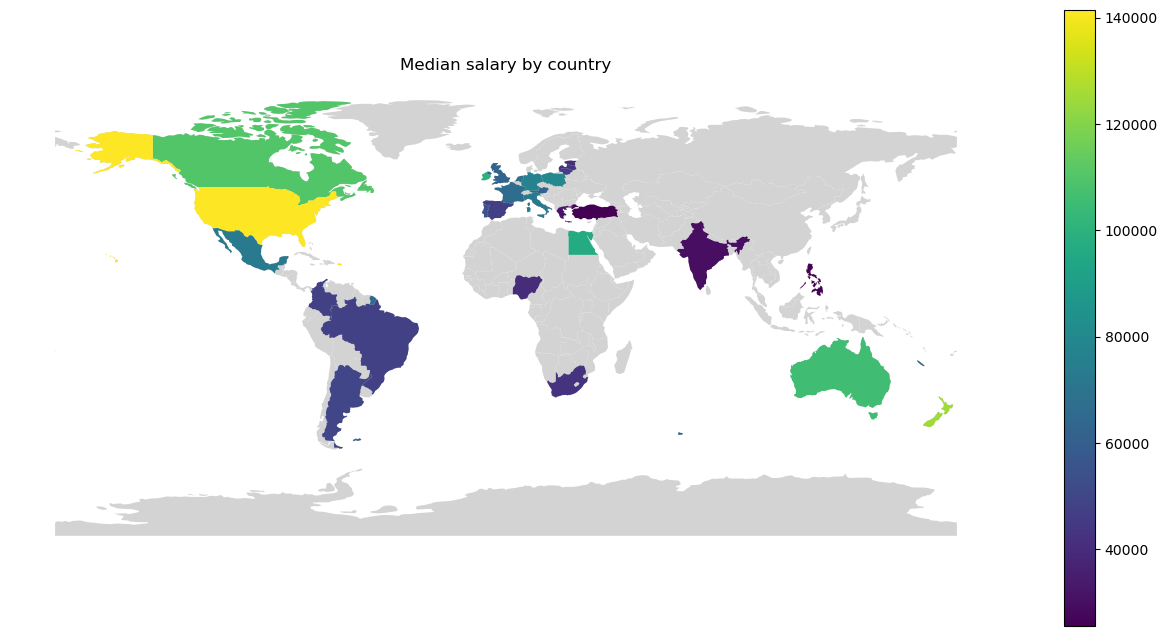

In [ ]:
# Map plot
url ="https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

map_data = pd.merge(left=world, right=median_salaries_by_country.reset_index(), left_on='SOVEREIGNT', right_on='Label', how='left')

# Plot grey background
fig, ax11 = plt.subplots(figsize=(16, 8))
world.plot(ax=ax11, color='lightgrey')

# Plot data
map_data.plot(ax=ax11, column='salary', legend=True, cmap='viridis')
ax11.set_title("Median salary by country")
ax11.axis('off')

North America, Australia and even Europe seem better off than the rest of the world.

### Job title VS Salary

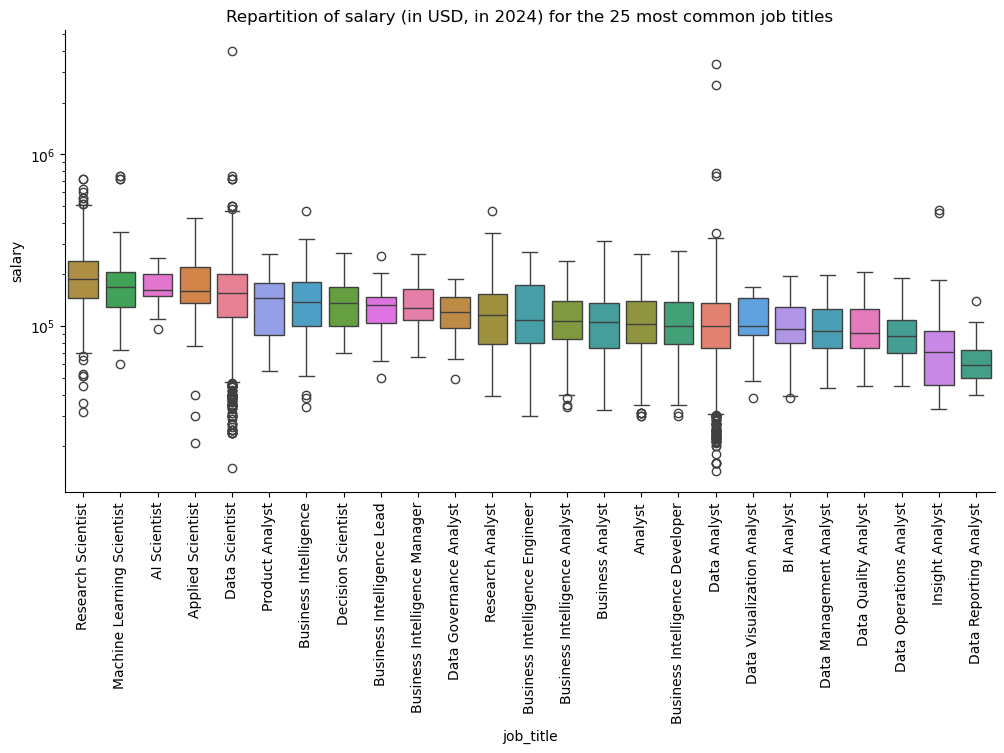

In [ ]:
# Select data
n_popular = 25
common_job_titles = data['job_title'].value_counts().nlargest(n_popular).reset_index()
job_title_sal_data = data[data['job_title'].isin(common_job_titles['job_title'])]
job_title_sal_data = job_title_sal_data[job_title_sal_data['work_year']==2024]
order_job_title = job_title_sal_data.groupby('job_title')['salary'].median().reset_index()
order_job_title = order_job_title.sort_values(by='salary', ascending=False).reset_index()

# Plot it
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(ax=ax, data=job_title_sal_data, x='job_title', y='salary', log_scale=True, hue="job_title", order=order_job_title['job_title'])
sns.despine(ax=ax, top=True, right=True)
ax.set_title(f"Repartition of salary (in USD, in 2024) for the {n_popular} most common job titles")
ticks = plt.xticks(rotation=90)

The job title seems to have an impact on the salary.

In [ ]:
# Hypothesis Test (ANOVA Welch because of sample size and variances) - Differences between salaries are significantly explained by employment type

# Test - ANOVA Welch
print('ANOVA results')
results_welch = pg.welch_anova(dv='salary', between='job_title', data=job_title_sal_data)
print("F value :", results_welch['F'][0])
print("p-value :", results_welch['p-unc'][0])

ANOVA results
F value : 136.37897302026886
p-value : 2.3243176407993615e-202


We oberve a very big F and p-value<0.05. According to this test, the difference between salaries for different job titles are probably not due to luck.  
> Note : we can't claim independance in the dataset without further information about the collection proscess and dependance would probably distort the result of an ANOVA test.  

### Work year VS Remote Ratio

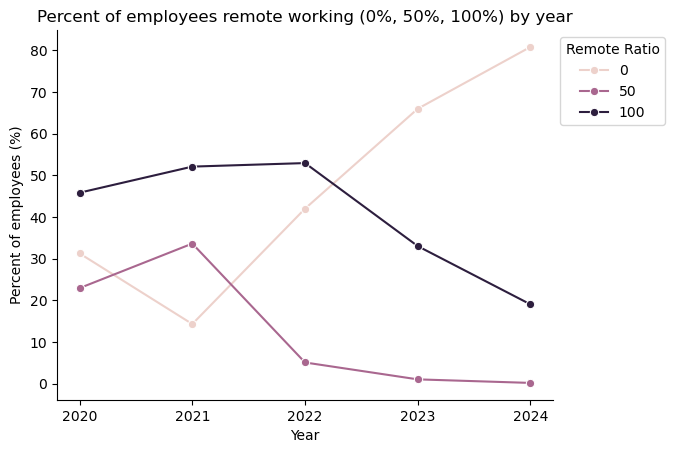

In [ ]:
# Prepare data
grouped = data.groupby(['work_year', 'remote_ratio']).size().reset_index()
grouped = grouped.rename(columns={0: 'count'})

total_per_year = data.groupby('work_year').size().reset_index(name='total')

grouped = pd.merge(grouped, total_per_year, on='work_year')
grouped['percent'] = grouped['count'] / grouped['total'] * 100

# Plot it
ax = sns.lineplot(data=grouped, x='work_year', y='percent', hue='remote_ratio', marker='o')
sns.despine(ax=ax, top=True, right=True)
plt.xlabel('Year')
plt.ylabel('Percent of employees (%)')
plt.title('Percent of employees remote working (0%, 50%, 100%) by year')
ax.legend(title='Remote Ratio', loc='upper left', bbox_to_anchor=(1, 1))
ticks = sorted(grouped['work_year'].unique())
ax.set_xticks(ticks)

plt.show()

We oberve a decreasing of hybrid and full remote position since 2021.

## Multivariate analysis
### Job Title, Experience level VS Salary

In [ ]:
# Select data
most_common_job_titles = most_common_job_titles.reset_index()
pos_xp_sal_data = data[data['job_title'].isin(most_common_job_titles['job_title'])]

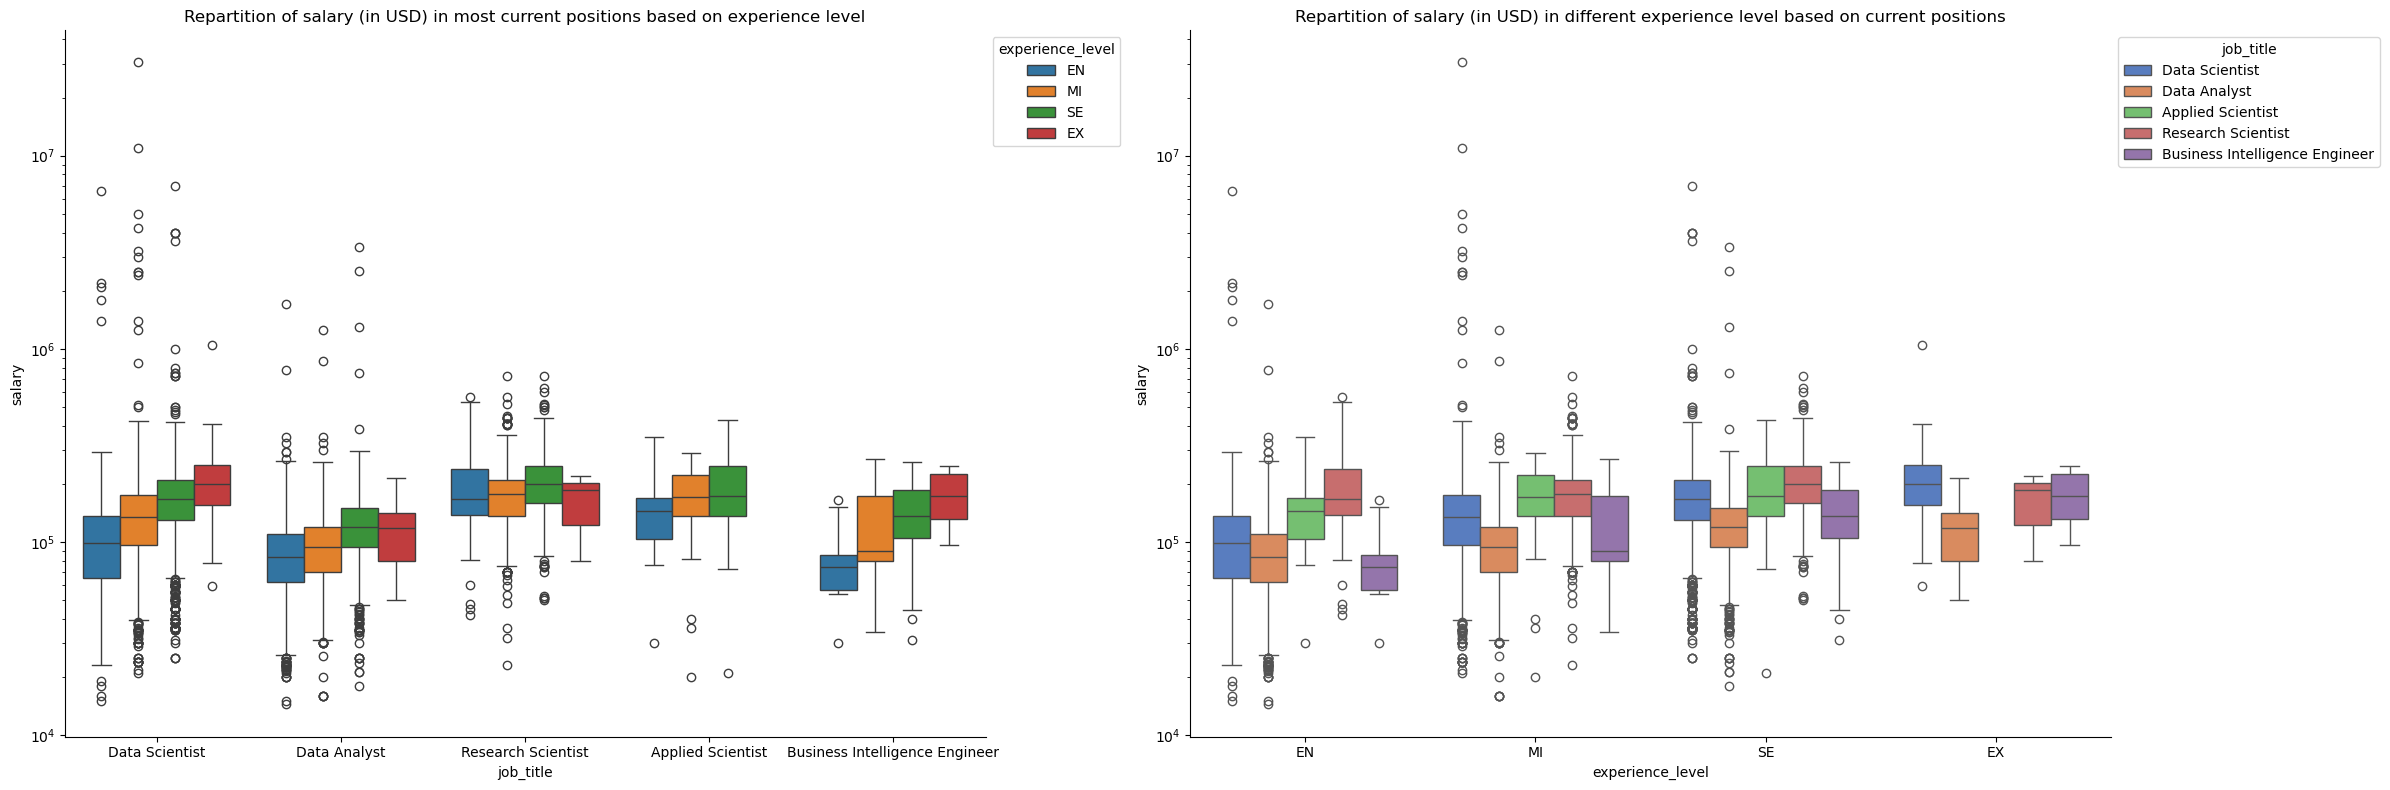

In [ ]:
# Plot it
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(24, 8))
sns.boxplot(ax=ax1, data=pos_xp_sal_data, x='job_title', y='salary', hue='experience_level', order=most_common_job_titles['job_title'], log_scale=True)
sns.despine(ax=ax1, top=True, right=True)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax1.set_title("Repartition of salary (in USD) in most current positions based on experience level")

sns.boxplot(ax=ax2, data=pos_xp_sal_data, x='experience_level', y='salary', hue='job_title', log_scale=True, palette='muted')
sns.despine(ax=ax2, top=True, right=True)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
ax2.set_title("Repartition of salary (in USD) in different experience level based on current positions")

plt.tight_layout()

We can see that experience seems correlated with salary for Data Scientist, Applied Scientist and BI Engineer.  
It is also true for technical Data Analysts and partialy for technical Research Scientist but not realy for executive positions of these jobs.

### Remote work, Experience and Salary

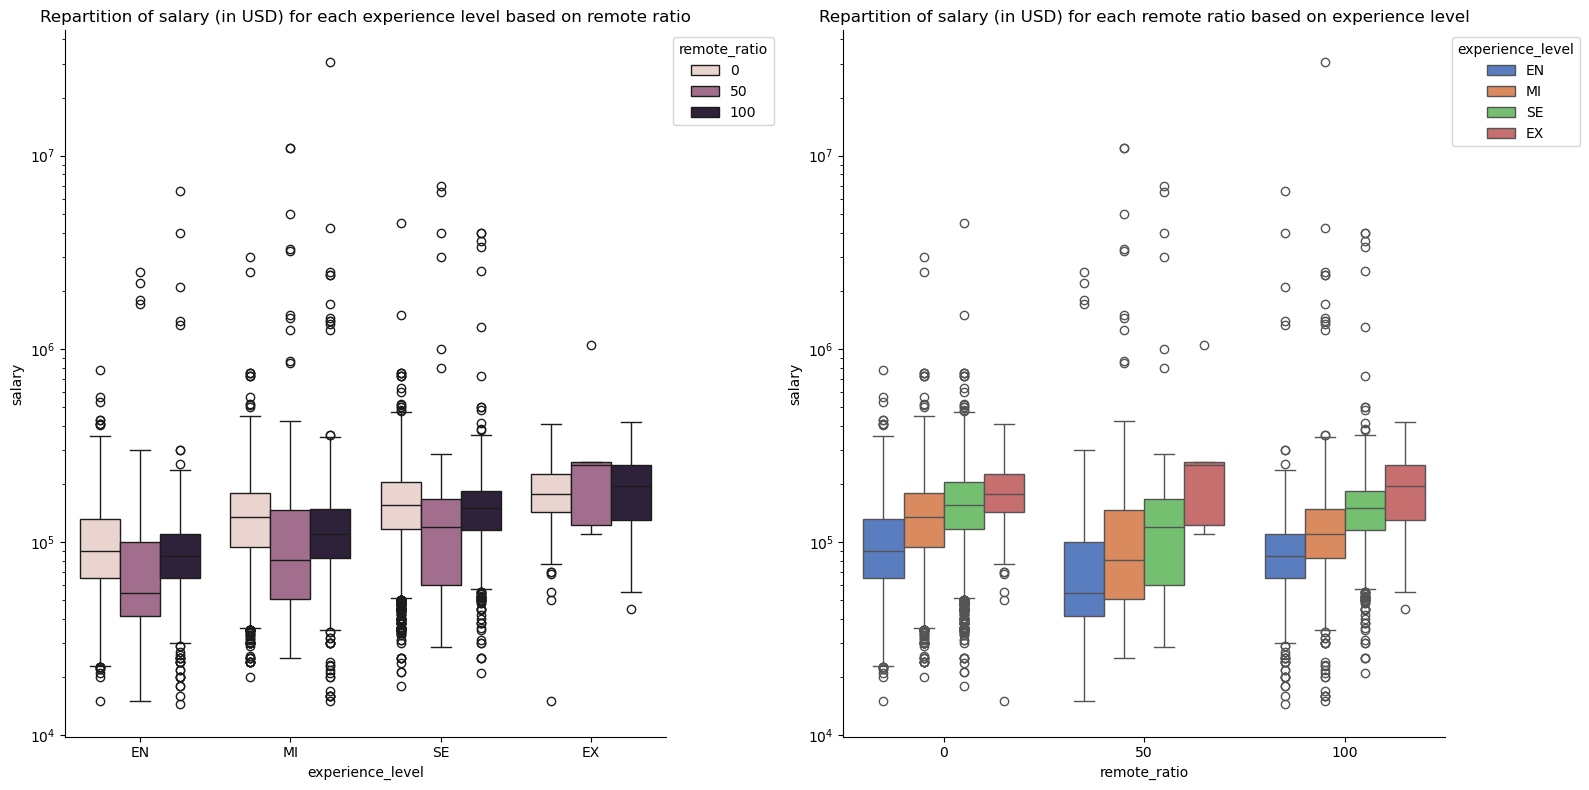

In [ ]:
# Plot it
fig, (ax2, ax3) = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))
sns.boxplot(ax=ax2, data=data, x='experience_level', y='salary', hue='remote_ratio', log_scale=True)
sns.despine(ax=ax2, top=True, right=True)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
ax2.set_title("Repartition of salary (in USD) for each experience level based on remote ratio")

# Less interesting, just to check
sns.boxplot(ax=ax3, data=data, x='remote_ratio', y='salary', hue='experience_level', log_scale=True, palette='muted')
sns.despine(ax=ax3, top=True, right=True)
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
ax3.set_title("Repartition of salary (in USD) for each remote ratio based on experience level")

plt.tight_layout()

Hybrid positions seems less lucrative for everyone except executive employees.  

### Company size, Experience level VS Salary

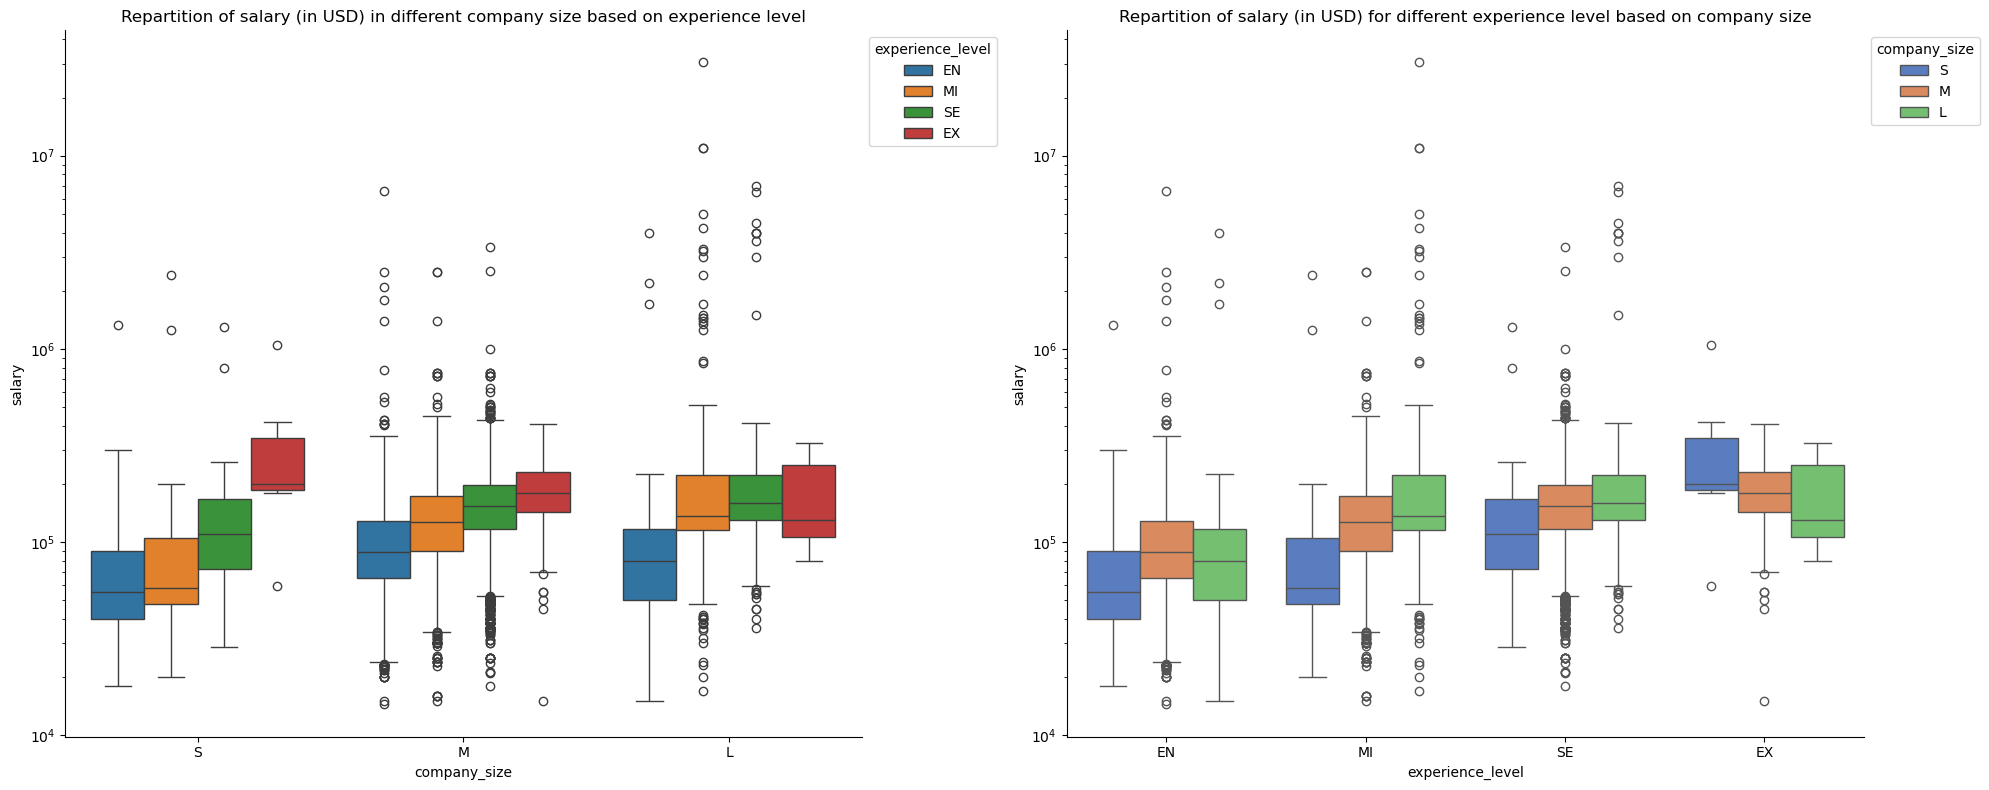

In [ ]:
# Plot it
fig, (ax4, ax5) = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))
sns.boxplot(ax=ax4, data=data, x='company_size', y='salary', hue='experience_level', log_scale=True)
sns.despine(ax=ax4, top=True, right=True)
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))
ax4.set_title("Repartition of salary (in USD) in different company size based on experience level")

sns.boxplot(ax=ax5, data=data, x='experience_level', y='salary', hue='company_size', log_scale=True, palette='muted')
sns.despine(ax=ax5, top=True, right=True)
sns.move_legend(ax5, "upper left", bbox_to_anchor=(1, 1))
ax5.set_title("Repartition of salary (in USD) for different experience level based on company size")

plt.tight_layout()

We observe the correlation between experience and salary in small and medium companies but in larger company, executive position seems less recognized.  
In small companies, everyone seems to earn less than in bigger company except for executive positions.

## Summary 
### Salary analysis

The **job title** of course shape the salary. But, the **experience level** seems to also impact a lot salaries with junior position earning less than intermediates who earn less than seniors who earn less than executives. However, the **size of the company** seems to modulate this general observation.  
The **employment type**, **remote ratio** and **company location** also play a part in the salary. This way a full time employee will be paid a bit more than a fixed-term one and an hybrid worker can be paid less than a full remote or full office one.  

> Note : the big inequalities in the sampling affect analysis for almost every variable but especially employment type and company location.  

### Suggestions
> Note : For information adapted to a position or a candidate profile, please refer to the related tab on my dashboard.
#### Trending jobs and field
Overall, the top 5 high paying jobs in 2024 <sup>1</sup> is : Research Scientist, ML Scientist, Applied Scientist, AI Scientist and Data Scientist. This indicate a trend in the AI and Data field, companies might want to stay competitive for related positions.  
<span style="font-size:0.8em;"> <sup>1</sup> Only positions with a significant amount of data were taken into account </span>  
#### Remote ratio
Globaly since 2021, remote position are becoming increasingly rare. I suggest to candidates to manage their expectations, especially about hybrid positions. For companies, you are no longer required to offer remote accomodations to stay competitive but could use this to stand out.
#### Salary
In case of a recruitement, I recommand to base the salary (in USD) on the different variables mentioned above. The company can offer or at least expect the candidates to ask for something in the interquartile range of salaries fitting the same main criteria (experience level and job title). You can then adjust the range (or value) based on the size of the company and its location, the employement type and remote ratio of the position.  
